In [322]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# # Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Read the data

housing = pd.read_csv("train.csv")

In [35]:
# Look at the first five rows

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
housing.shape

(1460, 81)

In [37]:
# There are total 1460 Rows and 81 columns in the data provided
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
# Removing columns Alley, PoolQC,  Fence, MiscFeature, FireplaceQu as more than 50% of the values in these columns are null 

housing.drop(['Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'],axis=1,inplace=True)

In [39]:
housing.shape

(1460, 76)

In [40]:
# Id column has 1460 Unique entries can be dropped

housing.drop(['Id'],axis=1,inplace=True)

In [41]:
housing.shape

(1460, 75)

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [43]:
# Check the summary of statistics

housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
# Dropping columns MasVnrArea, BsmtFinSF2, WoodDeckSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal as these columns more than 50% entries as Zero

housing.drop(['MasVnrArea','BsmtFinSF2', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1,inplace=True)



In [45]:
housing.shape

(1460, 67)

In [46]:
# Check the summary of statistics again

housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,66.256028,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,68.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,547.000000,12.000000,2010.000000,755000.000000


In [47]:
# Dropping columns OpenPorchSF, Fireplaces, as these columns more than 40% entries as Zero

housing.drop(['Fireplaces','OpenPorchSF'],axis=1,inplace=True)

In [48]:
housing.shape

(1460, 65)

In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [50]:
# Remove the null Rows from data . GarageType, GarageYrBlt, GarageFinish, GarageQual , GarageCond has around 81 null entries.

housing.dropna(subset=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], inplace=True)

In [51]:
housing.shape

(1379, 65)

In [52]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotFrontage    1127 non-null   float64
 3   LotArea        1379 non-null   int64  
 4   Street         1379 non-null   object 
 5   LotShape       1379 non-null   object 
 6   LandContour    1379 non-null   object 
 7   Utilities      1379 non-null   object 
 8   LotConfig      1379 non-null   object 
 9   LandSlope      1379 non-null   object 
 10  Neighborhood   1379 non-null   object 
 11  Condition1     1379 non-null   object 
 12  Condition2     1379 non-null   object 
 13  BldgType       1379 non-null   object 
 14  HouseStyle     1379 non-null   object 
 15  OverallQual    1379 non-null   int64  
 16  OverallCond    1379 non-null   int64  
 17  YearBuilt      1379 non-null   int64  
 18  YearRemo

In [53]:
# LotFrontage: Linear feet of street connected to property 252 missing values replace the values with Median

med=housing["LotFrontage"].median()
housing["LotFrontage"]=housing["LotFrontage"].fillna(med)

In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotFrontage    1379 non-null   float64
 3   LotArea        1379 non-null   int64  
 4   Street         1379 non-null   object 
 5   LotShape       1379 non-null   object 
 6   LandContour    1379 non-null   object 
 7   Utilities      1379 non-null   object 
 8   LotConfig      1379 non-null   object 
 9   LandSlope      1379 non-null   object 
 10  Neighborhood   1379 non-null   object 
 11  Condition1     1379 non-null   object 
 12  Condition2     1379 non-null   object 
 13  BldgType       1379 non-null   object 
 14  HouseStyle     1379 non-null   object 
 15  OverallQual    1379 non-null   int64  
 16  OverallCond    1379 non-null   int64  
 17  YearBuilt      1379 non-null   int64  
 18  YearRemo

In [55]:
# There are around 38 categorical objects out of 65

# Remove the null Rows from BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2 has around 21 null entries.

housing.dropna(subset=['BsmtExposure'], inplace=True)

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1348 non-null   int64  
 1   MSZoning       1348 non-null   object 
 2   LotFrontage    1348 non-null   float64
 3   LotArea        1348 non-null   int64  
 4   Street         1348 non-null   object 
 5   LotShape       1348 non-null   object 
 6   LandContour    1348 non-null   object 
 7   Utilities      1348 non-null   object 
 8   LotConfig      1348 non-null   object 
 9   LandSlope      1348 non-null   object 
 10  Neighborhood   1348 non-null   object 
 11  Condition1     1348 non-null   object 
 12  Condition2     1348 non-null   object 
 13  BldgType       1348 non-null   object 
 14  HouseStyle     1348 non-null   object 
 15  OverallQual    1348 non-null   int64  
 16  OverallCond    1348 non-null   int64  
 17  YearBuilt      1348 non-null   int64  
 18  YearRemo

In [57]:
# Remove the null Rows from Electrical has 1 null entry.

housing.dropna(subset=['Electrical'], inplace=True)

In [58]:
# Remove the null Rows from Electrical has 8 null entries.

housing.dropna(subset=['MasVnrType'], inplace=True)

In [59]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1339 non-null   int64  
 1   MSZoning       1339 non-null   object 
 2   LotFrontage    1339 non-null   float64
 3   LotArea        1339 non-null   int64  
 4   Street         1339 non-null   object 
 5   LotShape       1339 non-null   object 
 6   LandContour    1339 non-null   object 
 7   Utilities      1339 non-null   object 
 8   LotConfig      1339 non-null   object 
 9   LandSlope      1339 non-null   object 
 10  Neighborhood   1339 non-null   object 
 11  Condition1     1339 non-null   object 
 12  Condition2     1339 non-null   object 
 13  BldgType       1339 non-null   object 
 14  HouseStyle     1339 non-null   object 
 15  OverallQual    1339 non-null   int64  
 16  OverallCond    1339 non-null   int64  
 17  YearBuilt      1339 non-null   int64  
 18  YearRemo

In [60]:
housing.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       107
LotArea          1001
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         620
Length: 65, dtype: int64

In [67]:
housing.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,548,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2,460,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,608,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3,642,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3,836,TA,TA,Y,12,2008,WD,Normal,250000


In [68]:
# check the categorical columns and replace values

# Lets try with SaleCondition

housing = housing.replace({'SaleCondition':{'Normal':1,'Abnorml':2, 'AdjLand':3, 'Alloca':4, 'Family':5, 'Partial':6}})




In [69]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,548,TA,TA,Y,2,2008,WD,1,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2,460,TA,TA,Y,5,2007,WD,1,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,608,TA,TA,Y,9,2008,WD,1,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3,642,TA,TA,Y,2,2006,WD,2,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3,836,TA,TA,Y,12,2008,WD,1,250000


In [70]:
# create dummy variable for Condition1
SaleCondition_new = pd.get_dummies(housing['SaleCondition'],drop_first=True, prefix='SaleCondition')
housing = pd.concat([housing,SaleCondition_new],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,1,208500,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,1,181500,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,1,223500,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,2,140000,1,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,1,250000,0,0,0,0,0


In [71]:
#Drop Column SaleCondition after ceating dummy varaibles
housing=housing.drop(columns=['SaleCondition'])

In [72]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,MoSold,YrSold,SaleType,SalePrice,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,2,2008,WD,208500,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,5,2007,WD,181500,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,9,2008,WD,223500,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,2,2006,WD,140000,1,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,12,2008,WD,250000,0,0,0,0,0


In [73]:
housing.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1339 non-null   int64  
 1   MSZoning         1339 non-null   object 
 2   LotFrontage      1339 non-null   float64
 3   LotArea          1339 non-null   int64  
 4   Street           1339 non-null   object 
 5   LotShape         1339 non-null   object 
 6   LandContour      1339 non-null   object 
 7   Utilities        1339 non-null   object 
 8   LotConfig        1339 non-null   object 
 9   LandSlope        1339 non-null   object 
 10  Neighborhood     1339 non-null   object 
 11  Condition1       1339 non-null   object 
 12  Condition2       1339 non-null   object 
 13  BldgType         1339 non-null   object 
 14  HouseStyle       1339 non-null   object 
 15  OverallQual      1339 non-null   int64  
 16  OverallCond      1339 non-null   int64  
 17  YearBuilt     

In [74]:
# check the other categorical columns and replace values

# SaleType

housing = housing.replace({'SaleType':{'WD':1,'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':6, 'ConLw':7, 'ConLI':8,'ConLD':9, 'Oth':10}})

In [75]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,MoSold,YrSold,SaleType,SalePrice,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,2,2008,1,208500,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,5,2007,1,181500,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,9,2008,1,223500,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,2,2006,1,140000,1,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,12,2008,1,250000,0,0,0,0,0


In [76]:
# create dummy variable for SaleType
SaleType_new = pd.get_dummies(housing['SaleType'],drop_first=True, prefix='SaleType')
housing = pd.concat([housing,SaleType_new],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition_5,SaleCondition_6,SaleType_2,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleType_10
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#Drop Column SaleType after ceating dummy varaibles
housing=housing.drop(columns=['SaleType'])

In [78]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition_5,SaleCondition_6,SaleType_2,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleType_10
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0


In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1339 non-null   int64  
 1   MSZoning         1339 non-null   object 
 2   LotFrontage      1339 non-null   float64
 3   LotArea          1339 non-null   int64  
 4   Street           1339 non-null   object 
 5   LotShape         1339 non-null   object 
 6   LandContour      1339 non-null   object 
 7   Utilities        1339 non-null   object 
 8   LotConfig        1339 non-null   object 
 9   LandSlope        1339 non-null   object 
 10  Neighborhood     1339 non-null   object 
 11  Condition1       1339 non-null   object 
 12  Condition2       1339 non-null   object 
 13  BldgType         1339 non-null   object 
 14  HouseStyle       1339 non-null   object 
 15  OverallQual      1339 non-null   int64  
 16  OverallCond      1339 non-null   int64  
 17  YearBuilt     

In [80]:
# check the other categorical columns and replace values

# PavedDrive - Paved Driveway

housing = housing.replace({'PavedDrive':{'Y':1,'P':2, 'N':3}})

#  GarageCond - Garage Condition, not adding for NA as we have already deleted those rows

housing = housing.replace({'GarageCond':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

# GarageQual - Garage quality,  not adding for NA as we have already deleted those rows

housing = housing.replace({'GarageQual':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

# GarageFinish - Interior finish of the garage,  not adding for NA as we have already deleted those rows

housing = housing.replace({'GarageFinish':{'Fin':1,'RFn':2, 'Unf':3}})

# GarageType - Garage location,  not adding for NA as we have already deleted those rows

housing = housing.replace({'GarageType':{'2Types':1,'Attchd':2, 'Basment':3, 'BuiltIn':4, 'BuiltIn':5, 'Detchd':6}})



In [81]:
# create dummy variable for PavedDrive
PavedDrive_new = pd.get_dummies(housing['PavedDrive'],drop_first=True, prefix='PavedDrive')
housing = pd.concat([housing,PavedDrive_new],axis=1)

# create dummy variable for GarageCond
GarageCond_new = pd.get_dummies(housing['GarageCond'],drop_first=True, prefix='GarageCond')
housing = pd.concat([housing,GarageCond_new],axis=1)

# create dummy variable for GarageQual
GarageQual_new = pd.get_dummies(housing['GarageQual'],drop_first=True, prefix='GarageQual')
housing = pd.concat([housing,GarageQual_new],axis=1)

# create dummy variable for GarageFinish
GarageFinish_new = pd.get_dummies(housing['GarageFinish'],drop_first=True, prefix='GarageFinish')
housing = pd.concat([housing,GarageFinish_new],axis=1)

# create dummy variable for GarageType
GarageType_new = pd.get_dummies(housing['GarageType'],drop_first=True, prefix='GarageType')
housing = pd.concat([housing,GarageType_new],axis=1)

In [82]:
#Drop Columns after ceating dummy varaibles
housing=housing.drop(columns=['PavedDrive', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType'])

In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1339 non-null   int64  
 1   MSZoning            1339 non-null   object 
 2   LotFrontage         1339 non-null   float64
 3   LotArea             1339 non-null   int64  
 4   Street              1339 non-null   object 
 5   LotShape            1339 non-null   object 
 6   LandContour         1339 non-null   object 
 7   Utilities           1339 non-null   object 
 8   LotConfig           1339 non-null   object 
 9   LandSlope           1339 non-null   object 
 10  Neighborhood        1339 non-null   object 
 11  Condition1          1339 non-null   object 
 12  Condition2          1339 non-null   object 
 13  BldgType            1339 non-null   object 
 14  HouseStyle          1339 non-null   object 
 15  OverallQual         1339 non-null   int64  
 16  Overal

In [84]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual_4,GarageQual_5,GarageQual_Ex,GarageFinish_2,GarageFinish_3,GarageType_2,GarageType_3,GarageType_5,GarageType_6,GarageType_CarPort
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,1,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,1,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,1,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,1,0,0,0,0


In [85]:
# check the other categorical columns and replace values

housing = housing.replace({'Functional':{'TYP':1,'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8}})

#  KitchenQual - Kitchen quality

housing = housing.replace({'KitchenQual':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

# Electrical - Electrical system

housing = housing.replace({'Electrical':{'SBrkr':1,'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5}})

#  HeatingQC: Heating quality and condition

housing = housing.replace({'HeatingQC':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

#  Heating: Type of heating

housing = housing.replace({'Heating':{'Floor':1,'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6}})

# ExterQual: Evaluates the quality of the material on the exterior 

housing = housing.replace({'ExterQual':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

# ExterCond: Evaluates the present condition of the material on the exterior

housing = housing.replace({'ExterCond':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

# Variable CentralAir: Central air conditioning has only two unique values

housing = housing.replace({'CentralAir':{'Y':1,'N':0}})

# Variable Street: Type of road access to property only two unique values

housing = housing.replace({'Street':{'Grvl':1,'Pave':0}})

In [87]:
# create dummy variable for Functional
Functional_new = pd.get_dummies(housing['Functional'],drop_first=True, prefix='Functional')
housing = pd.concat([housing,Functional_new],axis=1)

# create dummy variable for KitchenQual
KitchenQual_new = pd.get_dummies(housing['KitchenQual'],drop_first=True, prefix='KitchenQual')
housing = pd.concat([housing,KitchenQual_new],axis=1)

# create dummy variable for Electrical
Electrical_new = pd.get_dummies(housing['Electrical'],drop_first=True, prefix='Electrical')
housing = pd.concat([housing,Electrical_new],axis=1)

# create dummy variable for HeatingQC
HeatingQC_new = pd.get_dummies(housing['HeatingQC'],drop_first=True, prefix='HeatingQC')
housing = pd.concat([housing,HeatingQC_new],axis=1)

# create dummy variable for Heating
Heating_new = pd.get_dummies(housing['Heating'],drop_first=True, prefix='Heating')
housing = pd.concat([housing,Heating_new],axis=1)

# create dummy variable for ExterQual
ExterQual_new = pd.get_dummies(housing['ExterQual'],drop_first=True, prefix='ExterQual')
housing = pd.concat([housing,ExterQual_new],axis=1)

# create dummy variable for ExterCond
ExterCond_new = pd.get_dummies(housing['ExterCond'],drop_first=True, prefix='ExterCond')
housing = pd.concat([housing,ExterCond_new],axis=1)


In [88]:
#Drop Columns after ceating dummy varaibles
housing=housing.drop(columns=['Functional', 'KitchenQual', 'Electrical', 'HeatingQC', 'Heating', 'ExterQual', 'ExterCond'])

In [90]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,HeatingQC_Ex,Heating_3,Heating_4,Heating_5,ExterQual_3,ExterQual_4,ExterQual_Ex,ExterCond_3,ExterCond_4,ExterCond_Ex
0,60,RL,65.0,8450,0,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,0,Reg,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,1,0,0,1,0,0
2,60,RL,68.0,11250,0,IR1,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,0,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,1,0,0
4,60,RL,84.0,14260,0,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,1,0,0


In [92]:
housing.shape

(1339, 113)

In [94]:
housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 113 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    MSSubClass          1339 non-null   int64  
 1    MSZoning            1339 non-null   object 
 2    LotFrontage         1339 non-null   float64
 3    LotArea             1339 non-null   int64  
 4    Street              1339 non-null   int64  
 5    LotShape            1339 non-null   object 
 6    LandContour         1339 non-null   object 
 7    Utilities           1339 non-null   object 
 8    LotConfig           1339 non-null   object 
 9    LandSlope           1339 non-null   object 
 10   Neighborhood        1339 non-null   object 
 11   Condition1          1339 non-null   object 
 12   Condition2          1339 non-null   object 
 13   BldgType            1339 non-null   object 
 14   HouseStyle          1339 non-null   object 
 15   OverallQual         1339 non-null   

In [95]:
# check the other categorical columns and replace values

# MSZoning: Identifies the general zoning classification of the sale.

housing = housing.replace({'MSZoning':{'A':1,'C':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8}})

# LotShape: General shape of property

housing = housing.replace({'LotShape':{'Reg':1,'IR1':2, 'IR2':3, 'IR3':4}})

# LandContour: Flatness of the property

housing = housing.replace({'LandContour':{'Lvl':1,'Bnk':2, 'HLS':3, 'Low':4}})

# Utilities: Type of utilities available

housing = housing.replace({'Utilities':{'AllPub':1,'NoSewr':2, 'NoSeWa':3, 'ELO':4}})

# LotConfig: Lot configuration

housing = housing.replace({'LotConfig':{'Inside':1,'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5}})

# LandSlope: Slope of property

housing = housing.replace({'LandSlope':{'Gtl':1,'Mod':2, 'Sev':3}})

# Neighborhood: Physical locations within Ames city limits

housing = housing.replace({'Neighborhood':{'Blmngtn':1,'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5, 'CollgCr':6, 'Crawfor':7, 'Edwards':8, 'Gilbert':9, 'IDOTRR':10, 'MeadowV':11, 'Mitchel':12, 'Names':13, 'NoRidge':14, 'NPkVill':15, 'NridgHt':16, 'NWAmes':17, 'OldTown':18, 'SWISU':19, 'Sawyer':20, 'SawyerW':21, 'Somerst':22, 'StoneBr': 23, 'Timber':24, 'Veenker':25}})

# Condition1: Proximity to various conditions

housing = housing.replace({'Condition1':{'Artery':1,'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9}})

# Condition2: Proximity to various conditions (if more than one is present)

housing = housing.replace({'Condition2':{'Artery':1,'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9}})

# BldgType: Type of dwelling

housing = housing.replace({'BldgType':{'1Fam':1,'2FmCon':2, 'Duplx':3, 'TwnhsE':4, 'TwnhsI':5}})

# HouseStyle: Style of dwelling

housing = housing.replace({'HouseStyle':{'1Story':1,'1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5, '2.5Unf':6, 'SFoyer':7, 'SLvl':8}})

In [96]:
# create dummy variable for MSZoning
MSZoning_new = pd.get_dummies(housing['MSZoning'],drop_first=True, prefix='MSZoning')
housing = pd.concat([housing,MSZoning_new],axis=1)

# create dummy variable for LotShape
LotShape_new = pd.get_dummies(housing['LotShape'],drop_first=True, prefix='LotShape')
housing = pd.concat([housing,LotShape_new],axis=1)

# create dummy variable for LandContour
LandContour_new = pd.get_dummies(housing['LandContour'],drop_first=True, prefix='LandContour')
housing = pd.concat([housing,LandContour_new],axis=1)

# create dummy variable for Utilities
Utilities_new = pd.get_dummies(housing['Utilities'],drop_first=True, prefix='Utilities')
housing = pd.concat([housing,Utilities_new],axis=1)

# create dummy variable for LotConfig
LotConfig_new = pd.get_dummies(housing['LotConfig'],drop_first=True, prefix='LotConfig')
housing = pd.concat([housing,LotConfig_new],axis=1)

# create dummy variable for LandSlope
LandSlope_new = pd.get_dummies(housing['LandSlope'],drop_first=True, prefix='LandSlope')
housing = pd.concat([housing,LandSlope_new],axis=1)

# create dummy variable for Neighborhood
Neighborhood_new = pd.get_dummies(housing['Neighborhood'],drop_first=True, prefix='Neighborhood')
housing = pd.concat([housing,Neighborhood_new],axis=1)

# create dummy variable for Condition1
Condition1_new = pd.get_dummies(housing['Condition1'],drop_first=True, prefix='Condition1')
housing = pd.concat([housing,Condition1_new],axis=1)

# create dummy variable for Condition2
Condition2_new = pd.get_dummies(housing['Condition2'],drop_first=True, prefix='Condition2')
housing = pd.concat([housing,Condition2_new],axis=1)

# create dummy variable for BldgType
BldgType_new = pd.get_dummies(housing['BldgType'],drop_first=True, prefix='BldgType')
housing = pd.concat([housing,BldgType_new],axis=1)

# create dummy variable for HouseStyle
HouseStyle_new = pd.get_dummies(housing['HouseStyle'],drop_first=True, prefix='HouseStyle')
housing = pd.concat([housing,HouseStyle_new],axis=1)

In [97]:
#Drop Columns after ceating dummy varaibles
housing=housing.drop(columns=['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle'])

In [98]:
housing.shape

(1339, 169)

In [99]:
housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 169 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    MSSubClass          1339 non-null   int64  
 1    LotFrontage         1339 non-null   float64
 2    LotArea             1339 non-null   int64  
 3    Street              1339 non-null   int64  
 4    OverallQual         1339 non-null   int64  
 5    OverallCond         1339 non-null   int64  
 6    YearBuilt           1339 non-null   int64  
 7    YearRemodAdd        1339 non-null   int64  
 8    RoofStyle           1339 non-null   object 
 9    RoofMatl            1339 non-null   object 
 10   Exterior1st         1339 non-null   object 
 11   Exterior2nd         1339 non-null   object 
 12   MasVnrType          1339 non-null   object 
 13   Foundation          1339 non-null   object 
 14   BsmtQual            1339 non-null   object 
 15   BsmtCond            1339 non-null   

In [100]:
# check the remaining categorical columns and replace values

# RoofStyle: Type of roof

housing = housing.replace({'RoofStyle':{'Flat':1,'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5, 'Shed':6}})

# RoofMatl: Roof material

housing = housing.replace({'RoofMatl':{'ClyTile':1,'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5, 'Tar&Grv':6, 'WdShake':7, 'WdShngl':8}})

# Exterior1st: Exterior covering on house

housing = housing.replace({'Exterior1st':{'AsbShng':1,'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Sdng':16, 'WdShing':17}})

# Exterior2nd: Exterior covering on house (if more than one material)

housing = housing.replace({'Exterior2nd':{'AsbShng':1,'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Sdng':16, 'WdShing':17}})

# MasVnrType: Masonry veneer type

housing = housing.replace({'MasVnrType':{'BrkCmn':1,'BrkFace':2, 'CBlock':3, 'None':4, 'Stone':5}})

# Foundation: Type of foundation

housing = housing.replace({'Foundation':{'BrkTil':1,'CBlock':2, 'PConc':3, 'Slab':4, 'Stone':5, 'Wood':6}})

# BsmtQual: Evaluates the height of the basement

housing = housing.replace({'BsmtQual':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

# BsmtCond: Evaluates the general condition of the basement

housing = housing.replace({'BsmtCond':{'EX':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5}})

# BsmtExposure: Refers to walkout or garden level walls

housing = housing.replace({'BsmtExposure':{'Gd':1,'Av':2, 'Mn':3, 'No':4}})

# BsmtFinType1: Rating of basement finished area

housing = housing.replace({'BsmtFinType1':{'GLQ':1,'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6}})

#BsmtFinType2: Rating of basement finished area (if multiple types)

housing = housing.replace({'BsmtFinType2':{'GLQ':1,'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6}})

In [101]:
# create dummy variable for RoofStyle
RoofStyle_new = pd.get_dummies(housing['RoofStyle'],drop_first=True, prefix='RoofStyle')
housing = pd.concat([housing,RoofStyle_new],axis=1)

# create dummy variable for RoofMatl
RoofMatl_new = pd.get_dummies(housing['RoofMatl'],drop_first=True, prefix='RoofMatl')
housing = pd.concat([housing,RoofMatl_new],axis=1)

# create dummy variable for Exterior1st
Exterior1st_new = pd.get_dummies(housing['Exterior1st'],drop_first=True, prefix='Exterior1st')
housing = pd.concat([housing,Exterior1st_new],axis=1)

# create dummy variable for Exterior2nd
Exterior2nd_new = pd.get_dummies(housing['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
housing = pd.concat([housing,Exterior2nd_new],axis=1)

# create dummy variable for MasVnrType
MasVnrType_new = pd.get_dummies(housing['MasVnrType'],drop_first=True, prefix='MasVnrType')
housing = pd.concat([housing,MasVnrType_new],axis=1)

# create dummy variable for Foundation
Foundation_new = pd.get_dummies(housing['Foundation'],drop_first=True, prefix='Foundation')
housing = pd.concat([housing,Foundation_new],axis=1)

# create dummy variable for BsmtQual
BsmtQual_new = pd.get_dummies(housing['BsmtQual'],drop_first=True, prefix='BsmtQual')
housing = pd.concat([housing,BsmtQual_new],axis=1)

# create dummy variable for BsmtCond
BsmtCond_new = pd.get_dummies(housing['BsmtCond'],drop_first=True, prefix='BsmtCond')
housing = pd.concat([housing,BsmtCond_new],axis=1)

# create dummy variable for BsmtExposure
BsmtExposure_new = pd.get_dummies(housing['BsmtExposure'],drop_first=True, prefix='BsmtExposure')
housing = pd.concat([housing,BsmtExposure_new],axis=1)

# create dummy variable for BsmtFinType1
BsmtFinType1_new = pd.get_dummies(housing['BsmtFinType1'],drop_first=True, prefix='BsmtFinType1')
housing = pd.concat([housing,BsmtFinType1_new],axis=1)

# create dummy variable for BsmtFinType2
BsmtFinType2_new = pd.get_dummies(housing['BsmtFinType2'],drop_first=True, prefix='BsmtFinType2')
housing = pd.concat([housing,BsmtFinType2_new],axis=1)

In [102]:
#Drop Columns after ceating dummy varaibles
housing=housing.drop(columns=['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])

In [103]:
housing.shape

(1339, 224)

In [104]:
housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 224 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    MSSubClass           1339 non-null   int64  
 1    LotFrontage          1339 non-null   float64
 2    LotArea              1339 non-null   int64  
 3    Street               1339 non-null   int64  
 4    OverallQual          1339 non-null   int64  
 5    OverallCond          1339 non-null   int64  
 6    YearBuilt            1339 non-null   int64  
 7    YearRemodAdd         1339 non-null   int64  
 8    BsmtFinSF1           1339 non-null   int64  
 9    BsmtUnfSF            1339 non-null   int64  
 10   TotalBsmtSF          1339 non-null   int64  
 11   CentralAir           1339 non-null   int64  
 12   1stFlrSF             1339 non-null   int64  
 13   2ndFlrSF             1339 non-null   int64  
 14   LowQualFinSF         1339 non-null   int64  
 15   GrLivArea          

In [106]:
housing.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_2.0,BsmtFinType2_3.0,BsmtFinType2_4.0,BsmtFinType2_5.0,BsmtFinType2_6.0
0,60,65.0,8450,0,7,5,2003,2003,706,150,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,0,6,8,1976,1976,978,284,...,1,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,0,7,5,2001,2002,486,434,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,0,7,5,1915,1970,216,540,...,1,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,0,8,5,2000,2000,655,490,...,0,0,0,0,0,0,0,0,0,1


In [269]:
# Splitting the data into training and testing set

housing_train, housing_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [270]:
housing_train.shape

(937, 224)

In [271]:
housing_test.shape

(402, 224)

In [272]:
housing_train.describe()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_2.0,BsmtFinType2_3.0,BsmtFinType2_4.0,BsmtFinType2_5.0,BsmtFinType2_6.0
count,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,55.672359,70.731057,10662.860192,0.002134,6.196371,5.598719,1973.406617,1985.950907,464.559232,576.462113,...,0.156884,0.107791,0.100320,0.053362,0.286019,0.012807,0.023479,0.038420,0.029883,0.881537
std,41.440107,21.334841,9724.636192,0.046176,1.309020,1.060720,28.548581,20.093950,432.501790,423.506754,...,0.363885,0.310282,0.300587,0.224874,0.452140,0.112500,0.151501,0.192312,0.170354,0.323328
min,20.000000,21.000000,1477.000000,0.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7795.000000,0.000000,5.000000,5.000000,1956.000000,1969.000000,0.000000,254.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,50.000000,70.000000,9591.000000,0.000000,6.000000,5.000000,1975.000000,1995.000000,425.000000,496.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,70.000000,80.000000,11600.000000,0.000000,7.000000,6.000000,2001.000000,2004.000000,733.000000,808.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,190.000000,313.000000,164660.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,2260.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [273]:
# Rescaling the features

# Apply scaler() to all the columns except the '1-0' and 'dummy' variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea','MoSold', 'YrSold', 'SalePrice']

housing_train[num_vars] = scaler.fit_transform(housing_train[num_vars])

housing_train.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_2.0,BsmtFinType2_3.0,BsmtFinType2_4.0,BsmtFinType2_5.0,BsmtFinType2_6.0
1431,0.588235,0.167808,0.021148,0,0.428571,0.571429,0.738462,0.433333,0.423894,0.000000,...,0,0,0,1,0,0,0,0,0,1
570,0.411765,0.181507,0.071233,0,0.285714,0.428571,0.653846,0.250000,0.102212,0.640839,...,0,0,0,1,0,0,0,0,0,1
173,0.000000,0.202055,0.053437,0,0.428571,0.428571,0.623077,0.183333,0.127434,0.299658,...,1,0,0,0,0,0,0,1,0,0
731,0.352941,0.178082,0.049717,0,0.571429,0.428571,0.946154,0.883333,0.347788,0.035103,...,0,0,0,0,0,0,0,0,0,1
1282,0.000000,0.136986,0.044876,0,0.285714,0.714286,0.746154,0.966667,0.235398,0.155822,...,0,0,0,1,0,0,0,1,0,0


In [274]:
housing_train.describe()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_2.0,BsmtFinType2_3.0,BsmtFinType2_4.0,BsmtFinType2_5.0,BsmtFinType2_6.0
count,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,0.209837,0.170312,0.056292,0.002134,0.456624,0.514103,0.718512,0.599182,0.205557,0.246773,...,0.156884,0.107791,0.100320,0.053362,0.286019,0.012807,0.023479,0.038420,0.029883,0.881537
std,0.243765,0.073065,0.059593,0.046176,0.187003,0.151531,0.219604,0.334899,0.191372,0.181296,...,0.363885,0.310282,0.300587,0.224874,0.452140,0.112500,0.151501,0.192312,0.170354,0.323328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.038717,0.000000,0.285714,0.428571,0.584615,0.316667,0.000000,0.108733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.176471,0.167808,0.049723,0.000000,0.428571,0.428571,0.730769,0.750000,0.188053,0.212329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.294118,0.202055,0.062035,0.000000,0.571429,0.571429,0.930769,0.900000,0.324336,0.345890,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [275]:
# Dividing into X and Y sets for the model building

y_train = housing_train.pop('SalePrice')

X_train = housing_train

In [276]:
# Building the linear reg model

# Selecting top 30 features

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select = 30) 
rfe = rfe.fit(X_train, y_train)

In [277]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 36),
 ('LotFrontage', False, 71),
 ('LotArea', True, 1),
 ('Street', False, 39),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 67),
 ('BsmtFinSF1', False, 180),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 156),
 ('1stFlrSF', False, 4),
 ('2ndFlrSF', False, 5),
 ('LowQualFinSF', False, 6),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 175),
 ('BsmtHalfBath', False, 133),
 ('FullBath', False, 137),
 ('HalfBath', False, 193),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 2),
 ('GarageYrBlt', False, 62),
 ('GarageCars', False, 80),
 ('GarageArea', True, 1),
 ('MoSold', False, 166),
 ('YrSold', False, 184),
 ('SaleCondition_2', False, 131),
 ('SaleCondition_3', False, 54),
 ('SaleCondition_4', False, 188),
 ('SaleCondition_5', False, 132),
 ('SaleCondition_6', False, 109),
 ('SaleType_2', False, 28),
 ('SaleType_4', False, 55),
 ('SaleType_5'

In [278]:
# Removing the variables which have high RFE values

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageArea', 'SaleType_10', 'GarageCond_Ex', 'GarageQual_Ex',
       'KitchenQual_Ex', 'Heating_5', 'LandSlope_3', 'Neighborhood_7',
       'Neighborhood_14', 'Condition2_6', 'Condition2_9', 'HouseStyle_5',
       'RoofStyle_6', 'RoofMatl_3', 'RoofMatl_8', 'Exterior1st_3',
       'Exterior1st_6', 'Exterior1st_8', 'Exterior2nd_CmentBd', 'Foundation_6',
       'BsmtQual_Ex'],
      dtype='object')

In [279]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'Street', 'YearRemodAdd', 'BsmtFinSF1',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'BsmtFinType1_2', 'BsmtFinType1_3', 'BsmtFinType1_4', 'BsmtFinType1_5',
       'BsmtFinType1_6', 'BsmtFinType2_2.0', 'BsmtFinType2_3.0',
       'BsmtFinType2_4.0', 'BsmtFinType2_5.0', 'BsmtFinType2_6.0'],
      dtype='object', length=193)

In [280]:
X_train_rfe = X_train[col]

In [281]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [282]:
 # Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()

In [283]:
# Check the Summary of Linear Model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     244.4
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:51:48   Log-Likelihood:                 1777.2
No. Observations:                 937   AIC:                            -3492.
Df Residuals:                     906   BIC:                            -3342.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1092    

In [284]:

# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallQual,21.73
7,BedroomAbvGr,19.87
3,YearBuilt,19.55
25,Exterior1st_6,18.84
27,Exterior2nd_CmentBd,18.80
6,GrLivArea,13.71
5,TotalBsmtSF,13.41
2,OverallCond,9.62
9,GarageArea,7.63
12,GarageQual_Ex,4.98


In [285]:
# VIF of OverallQual is very high

X_train_new = X_train_new.drop(['OverallQual'], axis = 1)

In [286]:
# Build the new model lm2

X_train_new = sm.add_constant(X_train_new)

lm2 = sm.OLS(y_train,X_train_new).fit()

In [287]:

# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,BedroomAbvGr,19.08
24,Exterior1st_6,18.79
26,Exterior2nd_CmentBd,18.75
2,YearBuilt,13.44
4,TotalBsmtSF,13.39
5,GrLivArea,10.60
1,OverallCond,9.18
8,GarageArea,7.56
11,GarageQual_Ex,4.96
10,GarageCond_Ex,4.30


In [288]:
# VIF of BedroomAbvGr is very high

X_train_new = X_train_new.drop(['BedroomAbvGr'], axis = 1)

# Build the new model lm2

X_train_new = sm.add_constant(X_train_new)

lm3 = sm.OLS(y_train,X_train_new).fit()

In [289]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,Exterior1st_6,18.78
25,Exterior2nd_CmentBd,18.74
4,TotalBsmtSF,13.39
2,YearBuilt,12.35
5,GrLivArea,7.72
7,GarageArea,7.54
1,OverallCond,6.25
10,GarageQual_Ex,4.96
9,GarageCond_Ex,4.30
3,BsmtUnfSF,3.56


In [290]:
# VIF of Exterior1st_6 is very high

X_train_new = X_train_new.drop(['Exterior1st_6'], axis = 1)

# Build the new model lm2

X_train_new = sm.add_constant(X_train_new)

lm4 = sm.OLS(y_train,X_train_new).fit()

In [291]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,TotalBsmtSF,13.39
2,YearBuilt,12.34
5,GrLivArea,7.69
7,GarageArea,7.53
1,OverallCond,6.24
10,GarageQual_Ex,4.95
9,GarageCond_Ex,4.30
3,BsmtUnfSF,3.55
0,LotArea,3.30
19,RoofStyle_6,2.39


In [292]:
# VIF of TotalBsmtSF is very high

X_train_new = X_train_new.drop(['TotalBsmtSF'], axis = 1)

# Build the new model lm2

X_train_new = sm.add_constant(X_train_new)

lm5 = sm.OLS(y_train,X_train_new).fit()

In [293]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,YearBuilt,10.48
4,GrLivArea,7.64
6,GarageArea,7.28
1,OverallCond,5.97
9,GarageQual_Ex,4.94
8,GarageCond_Ex,4.29
0,LotArea,3.20
3,BsmtUnfSF,3.06
18,RoofStyle_6,2.38
16,Condition2_9,2.24


In [294]:
# VIF of YearBuilt is very high

X_train_new = X_train_new.drop(['YearBuilt'], axis = 1)

# Build the new model lm6

X_train_new = sm.add_constant(X_train_new)

lm6 = sm.OLS(y_train,X_train_new).fit()

In [295]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,7.32
5,GarageArea,5.67
8,GarageQual_Ex,4.91
1,OverallCond,4.57
7,GarageCond_Ex,4.28
0,LotArea,3.20
2,BsmtUnfSF,2.93
17,RoofStyle_6,2.38
15,Condition2_9,2.24
11,LandSlope_3,1.96


In [296]:
# VIF of GrLivArea is very high

X_train_new = X_train_new.drop(['GrLivArea'], axis = 1)

# Build the new model lm7

X_train_new = sm.add_constant(X_train_new)

lm7 = sm.OLS(y_train,X_train_new).fit()

In [297]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,GarageQual_Ex,4.91
4,GarageArea,4.76
6,GarageCond_Ex,4.27
1,OverallCond,4.16
0,LotArea,3.04
2,BsmtUnfSF,2.73
16,RoofStyle_6,2.38
14,Condition2_9,2.24
10,LandSlope_3,1.95
23,BsmtQual_Ex,1.57


In [298]:
# VIFs are less than five now

lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     81.36
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          1.65e-207
Time:                        04:51:56   Log-Likelihood:                 1279.3
No. Observations:                 937   AIC:                            -2509.
Df Residuals:                     912   BIC:                            -2388.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0590      0.010      5.890      0.000       0.039       0.079
LotArea                 0.3715      0.044      8.465      0.000       0.285       0.458
OverallCond            -0.0026      0.015     -0.177      0.860      -0.031       0.026
BsmtUnfSF               0.0331      0.012      2.834      0.005       0.010       0.056
KitchenAbvGr           -0.1263      0.024     -5.363      0.000      -0.173      -0.080
GarageArea              0.2613      0.016     16.687      0.000       0.231       0.292
SaleType_10            -0.0316      0.063     -0.504      0.614      -0.155       0.092
GarageCond_Ex          -0.2138      0.092     -2.330      0.020      -0.394      -0.034
GarageQual_Ex           0.1335      0.080      1.660      0.097      -0.024       0.291
KitchenQual_Ex          0.1029      0.010     10.257      0.000       0.083       0.123
Heating_5              -0.0319      0.063     -0.509      0.611      -0.155       0.091
LandSlope_3            -0.1150      0.029     -3.938      0.000      -0.172      -0.058
Neighborhood_7          0.0721      0.011      6.543      0.000       0.050       0.094
Neighborhood_14         0.1627      0.012     13.091      0.000       0.138       0.187
Condition2_6           -0.2346      0.047     -5.043      0.000      -0.326      -0.143
Condition2_9           -0.1533      0.094     -1.635      0.102      -0.337       0.031
HouseStyle_5           -0.0399      0.036     -1.094      0.274      -0.111       0.032
RoofStyle_6             0.2023      0.068      2.962      0.003       0.068       0.336
RoofMatl_3              0.1726      0.068      2.554      0.011       0.040       0.305
RoofMatl_8              0.1319      0.032      4.067      0.000       0.068       0.196
Exterior1st_3          -0.1345      0.063     -2.134      0.033      -0.258      -0.011
Exterior1st_8          -0.0863      0.064     -1.352      0.177      -0.211       0.039
Exterior2nd_CmentBd     0.0276      0.012      2.384      0.017       0.005       0.050
Foundation_6            0.0127      0.036      0.349      0.727      -0.059       0.084
BsmtQual_Ex             0.1079      0.009     12.127      0.000       0.090       0.125
==============================================================================
Omnibus:                       98.926   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.165
Skew:                           0.464   Prob(JB):                     3.38e-77
Kurtosis:                       5.856   Cond. No.                         70.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
# High P value OverallCond drop this variable and rebuild the model

X_train_new = X_train_new.drop(['OverallCond'], axis = 1)

# Build the new model lm8

X_train_new = sm.add_constant(X_train_new)

lm8 = sm.OLS(y_train,X_train_new).fit()

In [300]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,GarageQual_Ex,4.90
5,GarageCond_Ex,4.27
3,GarageArea,3.61
0,LotArea,2.79
1,BsmtUnfSF,2.46
15,RoofStyle_6,2.37
13,Condition2_9,2.23
9,LandSlope_3,1.92
22,BsmtQual_Ex,1.53
7,KitchenQual_Ex,1.48


In [301]:
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     84.99
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          1.79e-208
Time:                        04:51:58   Log-Likelihood:                 1279.3
No. Observations:                 937   AIC:                            -2511.
Df Residuals:                     913   BIC:                            -2394.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0575      0.005     10.821      0.000       0.047       0.068
LotArea                 0.3712      0.044      8.469      0.000       0.285       0.457
BsmtUnfSF               0.0334      0.012      2.880      0.004       0.011       0.056
KitchenAbvGr           -0.1259      0.023     -5.376      0.000      -0.172      -0.080
GarageArea              0.2618      0.015     16.913      0.000       0.231       0.292
SaleType_10            -0.0314      0.063     -0.500      0.617      -0.154       0.092
GarageCond_Ex          -0.2127      0.091     -2.325      0.020      -0.392      -0.033
GarageQual_Ex           0.1322      0.080      1.651      0.099      -0.025       0.289
KitchenQual_Ex          0.1028      0.010     10.264      0.000       0.083       0.123
Heating_5              -0.0316      0.063     -0.505      0.614      -0.155       0.091
LandSlope_3            -0.1150      0.029     -3.940      0.000      -0.172      -0.058
Neighborhood_7          0.0716      0.011      6.661      0.000       0.051       0.093
Neighborhood_14         0.1628      0.012     13.109      0.000       0.138       0.187
Condition2_6           -0.2348      0.047     -5.048      0.000      -0.326      -0.143
Condition2_9           -0.1532      0.094     -1.635      0.102      -0.337       0.031
HouseStyle_5           -0.0399      0.036     -1.096      0.273      -0.111       0.032
RoofStyle_6             0.2022      0.068      2.962      0.003       0.068       0.336
RoofMatl_3              0.1722      0.068      2.551      0.011       0.040       0.305
RoofMatl_8              0.1319      0.032      4.069      0.000       0.068       0.196
Exterior1st_3          -0.1335      0.063     -2.128      0.034      -0.257      -0.010
Exterior1st_8          -0.0861      0.064     -1.351      0.177      -0.211       0.039
Exterior2nd_CmentBd     0.0277      0.012      2.391      0.017       0.005       0.050
Foundation_6            0.0127      0.036      0.350      0.726      -0.059       0.084
BsmtQual_Ex             0.1080      0.009     12.230      0.000       0.091       0.125
==============================================================================
Omnibus:                       98.903   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.574
Skew:                           0.464   Prob(JB):                     4.54e-77
Kurtosis:                       5.854   Cond. No.                         63.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
# High P value Foundation_6 drop this variable and rebuild the model

X_train_new = X_train_new.drop(['Foundation_6'], axis = 1)

# Build the new model lm9

X_train_new = sm.add_constant(X_train_new)

lm9 = sm.OLS(y_train,X_train_new).fit()

In [303]:
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     88.93
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          1.99e-209
Time:                        04:51:59   Log-Likelihood:                 1279.3
No. Observations:                 937   AIC:                            -2513.
Df Residuals:                     914   BIC:                            -2401.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0575      0.005     10.841      0.000       0.047       0.068
LotArea                 0.3715      0.044      8.480      0.000       0.286       0.457
BsmtUnfSF               0.0331      0.012      2.863      0.004       0.010       0.056
KitchenAbvGr           -0.1259      0.023     -5.381      0.000      -0.172      -0.080
GarageArea              0.2620      0.015     16.947      0.000       0.232       0.292
SaleType_10            -0.0314      0.063     -0.500      0.617      -0.154       0.092
GarageCond_Ex          -0.2129      0.091     -2.328      0.020      -0.392      -0.033
GarageQual_Ex           0.1322      0.080      1.653      0.099      -0.025       0.289
KitchenQual_Ex          0.1028      0.010     10.266      0.000       0.083       0.122
Heating_5              -0.0317      0.063     -0.506      0.613      -0.155       0.091
LandSlope_3            -0.1152      0.029     -3.948      0.000      -0.172      -0.058
Neighborhood_7          0.0716      0.011      6.661      0.000       0.051       0.093
Neighborhood_14         0.1627      0.012     13.111      0.000       0.138       0.187
Condition2_6           -0.2348      0.046     -5.051      0.000      -0.326      -0.144
Condition2_9           -0.1532      0.094     -1.637      0.102      -0.337       0.031
HouseStyle_5           -0.0400      0.036     -1.098      0.272      -0.111       0.031
RoofStyle_6             0.2022      0.068      2.963      0.003       0.068       0.336
RoofMatl_3              0.1723      0.067      2.552      0.011       0.040       0.305
RoofMatl_8              0.1319      0.032      4.070      0.000       0.068       0.196
Exterior1st_3          -0.1335      0.063     -2.128      0.034      -0.257      -0.010
Exterior1st_8          -0.0862      0.064     -1.353      0.176      -0.211       0.039
Exterior2nd_CmentBd     0.0276      0.012      2.390      0.017       0.005       0.050
BsmtQual_Ex             0.1080      0.009     12.232      0.000       0.091       0.125
==============================================================================
Omnibus:                       98.748   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.156
Skew:                           0.463   Prob(JB):                     5.59e-77
Kurtosis:                       5.852   Cond. No.                         63.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# High P value SaleType_10, Heating_5  drop these variable and rebuild the model

X_train_new = X_train_new.drop(['SaleType_10', 'Heating_5'], axis = 1)

# Build the new model lm9

X_train_new = sm.add_constant(X_train_new)

lm10 = sm.OLS(y_train,X_train_new).fit()

In [305]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,GarageQual_Ex,4.90
4,GarageCond_Ex,4.27
3,GarageArea,3.59
0,LotArea,2.79
1,BsmtUnfSF,2.45
13,RoofStyle_6,2.37
11,Condition2_9,2.23
7,LandSlope_3,1.92
19,BsmtQual_Ex,1.53
6,KitchenQual_Ex,1.48


In [306]:
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     97.96
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.61e-211
Time:                        04:52:01   Log-Likelihood:                 1279.0
No. Observations:                 937   AIC:                            -2516.
Df Residuals:                     916   BIC:                            -2414.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0574      0.005     10.830      0.000       0.047       0.068
LotArea                 0.3714      0.044      8.484      0.000       0.285       0.457
BsmtUnfSF               0.0330      0.012      2.857      0.004       0.010       0.056
KitchenAbvGr           -0.1258      0.023     -5.380      0.000      -0.172      -0.080
GarageArea              0.2624      0.015     17.003      0.000       0.232       0.293
GarageCond_Ex          -0.2128      0.091     -2.329      0.020      -0.392      -0.033
GarageQual_Ex           0.1322      0.080      1.654      0.099      -0.025       0.289
KitchenQual_Ex          0.1028      0.010     10.275      0.000       0.083       0.122
LandSlope_3            -0.1151      0.029     -3.948      0.000      -0.172      -0.058
Neighborhood_7          0.0717      0.011      6.675      0.000       0.051       0.093
Neighborhood_14         0.1627      0.012     13.122      0.000       0.138       0.187
Condition2_6           -0.2350      0.046     -5.059      0.000      -0.326      -0.144
Condition2_9           -0.1532      0.094     -1.637      0.102      -0.337       0.030
HouseStyle_5           -0.0400      0.036     -1.098      0.272      -0.111       0.031
RoofStyle_6             0.2022      0.068      2.965      0.003       0.068       0.336
RoofMatl_3              0.1722      0.067      2.554      0.011       0.040       0.305
RoofMatl_8              0.1319      0.032      4.074      0.000       0.068       0.195
Exterior1st_3          -0.1333      0.063     -2.128      0.034      -0.256      -0.010
Exterior1st_8          -0.0862      0.064     -1.354      0.176      -0.211       0.039
Exterior2nd_CmentBd     0.0277      0.012      2.396      0.017       0.005       0.050
BsmtQual_Ex             0.1080      0.009     12.242      0.000       0.091       0.125
==============================================================================
Omnibus:                       98.675   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.949
Skew:                           0.464   Prob(JB):                     1.02e-76
Kurtosis:                       5.847   Cond. No.                         63.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
# High P value HouseStyle_5  drop these variable and rebuild the model

X_train_new = X_train_new.drop(['HouseStyle_5'], axis = 1)

# Build the new model lm11

X_train_new = sm.add_constant(X_train_new)

lm11 = sm.OLS(y_train,X_train_new).fit()

In [308]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,GarageQual_Ex,3.85
3,GarageArea,3.59
4,GarageCond_Ex,3.57
0,LotArea,2.79
1,BsmtUnfSF,2.44
12,RoofStyle_6,2.37
11,Condition2_9,2.23
7,LandSlope_3,1.92
18,BsmtQual_Ex,1.52
6,KitchenQual_Ex,1.48


In [309]:
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          4.61e-212
Time:                        04:52:03   Log-Likelihood:                 1278.4
No. Observations:                 937   AIC:                            -2517.
Df Residuals:                     917   BIC:                            -2420.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0573      0.005     10.812      0.000       0.047       0.068
LotArea                 0.3710      0.044      8.475      0.000       0.285       0.457
BsmtUnfSF               0.0333      0.012      2.884      0.004       0.011       0.056
KitchenAbvGr           -0.1256      0.023     -5.370      0.000      -0.171      -0.080
GarageArea              0.2622      0.015     16.993      0.000       0.232       0.293
GarageCond_Ex          -0.1720      0.084     -2.060      0.040      -0.336      -0.008
GarageQual_Ex           0.0915      0.071      1.292      0.197      -0.048       0.231
KitchenQual_Ex          0.1033      0.010     10.328      0.000       0.084       0.123
LandSlope_3            -0.1149      0.029     -3.941      0.000      -0.172      -0.058
Neighborhood_7          0.0706      0.011      6.603      0.000       0.050       0.092
Neighborhood_14         0.1628      0.012     13.132      0.000       0.139       0.187
Condition2_6           -0.2348      0.046     -5.055      0.000      -0.326      -0.144
Condition2_9           -0.1532      0.094     -1.637      0.102      -0.337       0.030
RoofStyle_6             0.2022      0.068      2.964      0.003       0.068       0.336
RoofMatl_3              0.1723      0.067      2.554      0.011       0.040       0.305
RoofMatl_8              0.1322      0.032      4.083      0.000       0.069       0.196
Exterior1st_3          -0.1334      0.063     -2.128      0.034      -0.256      -0.010
Exterior1st_8          -0.0862      0.064     -1.354      0.176      -0.211       0.039
Exterior2nd_CmentBd     0.0279      0.012      2.412      0.016       0.005       0.051
BsmtQual_Ex             0.1074      0.009     12.195      0.000       0.090       0.125
==============================================================================
Omnibus:                       98.363   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.863
Skew:                           0.453   Prob(JB):                     1.95e-78
Kurtosis:                       5.889   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
X_train_lm = sm.add_constant(X_train_new)

y_train_cnt = lm11.predict(X_train_lm)


Text(0.5, 0, 'Errors')

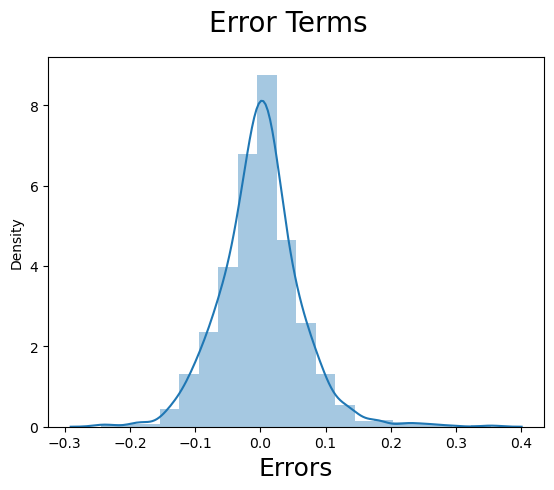

In [311]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [312]:
# Model Prediction

# Applying the scaling on the test sets
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea','MoSold', 'YrSold', 'SalePrice']

housing_test[num_vars] = scaler.transform(housing_test[num_vars])

housing_test.head()



,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_2.0,BsmtFinType2_3.0,BsmtFinType2_4.0,BsmtFinType2_5.0,BsmtFinType2_6.0
12,0.000000,0.167808,0.070418,0,0.285714,0.571429,0.630769,0.200000,0.326106,0.074914,...,1,0,0,0,0,0,0,0,0,1
334,0.235294,0.130137,0.046359,0,0.428571,0.428571,0.907692,0.800000,0.366372,0.049229,...,0,0,0,0,0,0,0,0,0,1
347,0.000000,0.167808,0.098803,0,0.428571,0.428571,0.615385,0.166667,0.561947,0.089041,...,0,1,0,0,0,0,0,0,0,1
884,0.000000,0.150685,0.034765,0,0.285714,0.428571,0.669231,0.283333,0.191150,0.196918,...,0,1,0,0,0,0,0,0,0,1
175,0.000000,0.215753,0.068255,0,0.428571,0.714286,0.538462,0.850000,0.211062,0.310360,...,1,0,0,0,0,0,0,0,0,1


In [313]:
# Dividing into X_test and y_test

y_test = housing_test.pop('SalePrice')

X_test = housing_test



In [314]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [315]:
# Running the Model

test_lm = sm.OLS(y_test,X_test_new).fit()

In [316]:
# Making predictions

y_pred = lm11.predict(X_test_new)

In [317]:
# Calculate R2 score

# calculate R2 Score

r2 = r2_score(y_test, y_pred)

In [318]:
print(r2)

0.589447400031301


Text(0, 0.5, 'y_pred')

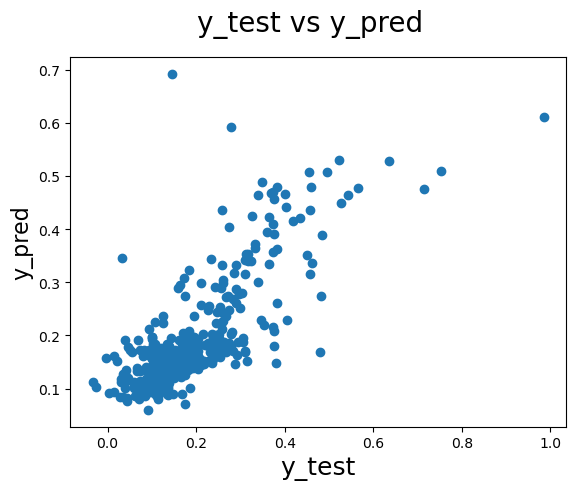

In [319]:
# Model Evaluation

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [320]:

# calculate R2 Score

r2_train_lm = r2_score(y_train, y_train_cnst)
r2_test_lm = r2_score(y_test, y_pred)
print(r2_train_lm)
print(r2_test_lm)

0.6816374169872681
0.589447400031301


In [323]:
# Ridge Regression

params = {'alpha': [0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 
20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [324]:
print(model_cv.best_params_)

{'alpha': 0.6}


In [325]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
alpha = 0.6 
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.27345818  0.03335843 -0.11686912  0.25886462 -0.08136663  0.02460561
  0.10332421 -0.05602096  0.07040518  0.16153226 -0.16781644 -0.02255203
  0.08645675  0.08175864  0.14436738 -0.08368271 -0.05157221  0.02345638
  0.10724838]


In [327]:
y_pred_train = ridge.predict(X_train_new)

In [328]:
r2_train_ridge = r2_score(y_train, y_pred_train)

In [329]:
print(r2_train_ridge)

0.6768748046090258


In [334]:
ridge.fit(X_test_new, y_test)
y_pred_test = ridge.predict(X_test_new)
r2_test_ridge = r2_score(y_test, y_pred_test)

In [335]:
print(r2_test_ridge)

0.6011038846223177


In [367]:
# Lasso Regression

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [368]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [369]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.01)

In [370]:
lasso.coef_

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.00552221,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.07744835])

In [371]:
y_pred_train = lasso.predict(X_train_new)

In [380]:
r2_train_lasso = r2_score(y_train, y_pred_train)

In [381]:
print(r2_train_lasso)

0.1790063740243405


In [383]:
lasso.fit(X_test_new, y_test)

Lasso(alpha=0.01)

In [384]:
y_pred_test = lasso.predict(X_test_new)

In [386]:
r2_test_lasso = r2_score(y_test, y_pred_test)

In [388]:
print(r2_test_lasso)

0.31934816410328426
